In [1]:
import pandas as pd #fetch CSV file
import numpy as np #for Mathematical functions
import matplotlib.pyplot as plt #Plot graphs/charts
import seaborn as sns #data Visualization

### Data Exploration

In [2]:
train = pd.read_csv('cardio_train.csv', delimiter=';') #using delimiter since the data is not in columnar form

In [3]:
train.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
train.describe().T #Just to check the data 

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [5]:
train_na = (train.isnull().sum() / len(train)) * 100  #Check if there are any missing/null values

In [6]:
train_na

id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64

<AxesSubplot:xlabel='weight'>

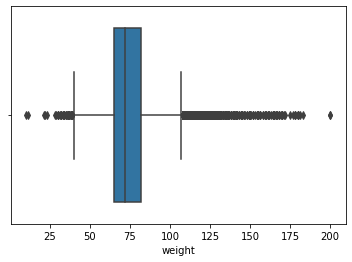

In [7]:
import seaborn as sns
sns.boxplot(x=train['weight'])

In [8]:
upper_lim = train['weight'].quantile(.95)
lower_lim = train['weight'].quantile(.05) # Top 5% means here the values that are out of the 95th percentile of data

train_filtered = train[(train['weight'] < upper_lim) & (train['weight'] > lower_lim)]
train = train_filtered
train.shape

(62046, 13)

<AxesSubplot:xlabel='height'>

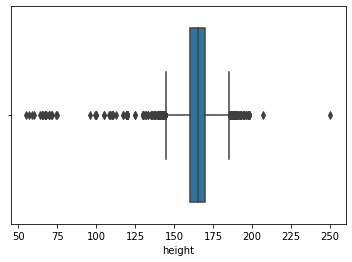

In [9]:
sns.boxplot(x=train['height'])

In [10]:
upper_lim = train['height'].quantile(.95)
lower_lim = train['height'].quantile(.05) # Top 5% means here the values that are out of the 95th percentile of data

train_filtered = train[(train['height'] < upper_lim) & (train['height'] > lower_lim)]
train = train_filtered
train.shape

(55508, 13)

In [11]:
train['height_square'] = (train['height']/100) * (train['height']/100)

In [12]:
train['BMI'] = train['weight'] / (train['height_square'])

In [13]:
train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_square,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,2.8224,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,2.4336,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,2.7225,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,2.8561,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,2.4336,23.011177


In [14]:
train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_square,BMI
count,55508.000000,55508.000000,55508.000000,55508.000000,55508.000000,55508.000000,55508.000000,55508.000000,55508.000000,55508.000000,55508.000000,55508.000000,55508.000000,55508.000000,55508.000000
mean,49876.032824,19473.864830,1.344743,164.599265,73.214438,128.260665,94.871712,1.351913,1.219176,0.084366,0.051776,0.804821,0.496253,2.712745,27.077208
std,28825.216343,2450.728055,0.475289,5.876602,10.285447,142.456737,176.829356,0.670412,0.566438,0.277939,0.221577,0.396342,0.499990,0.193538,3.985201
min,0.000000,10798.000000,1.000000,153.000000,55.200000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.340900,18.078512
25%,24953.250000,17705.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.560000,24.023809
50%,49862.500000,19702.500000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.722500,26.259585
75%,74697.250000,21314.000000,2.000000,169.000000,80.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.856100,29.585799
max,99999.000000,23713.000000,2.000000,177.000000,99.900000,16020.000000,10000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.132900,42.291426


In [15]:
train['BMI category'] = pd.cut(x=train['BMI'], bins=[3,18.5, 24.9, 29.9,299], labels=[1,2,3,4])
train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_square,BMI,BMI category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,2.8224,21.967120,2
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,2.4336,34.927679,4
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,2.7225,23.507805,2
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,2.8561,28.710479,3
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,2.4336,23.011177,2


### Data Visualization

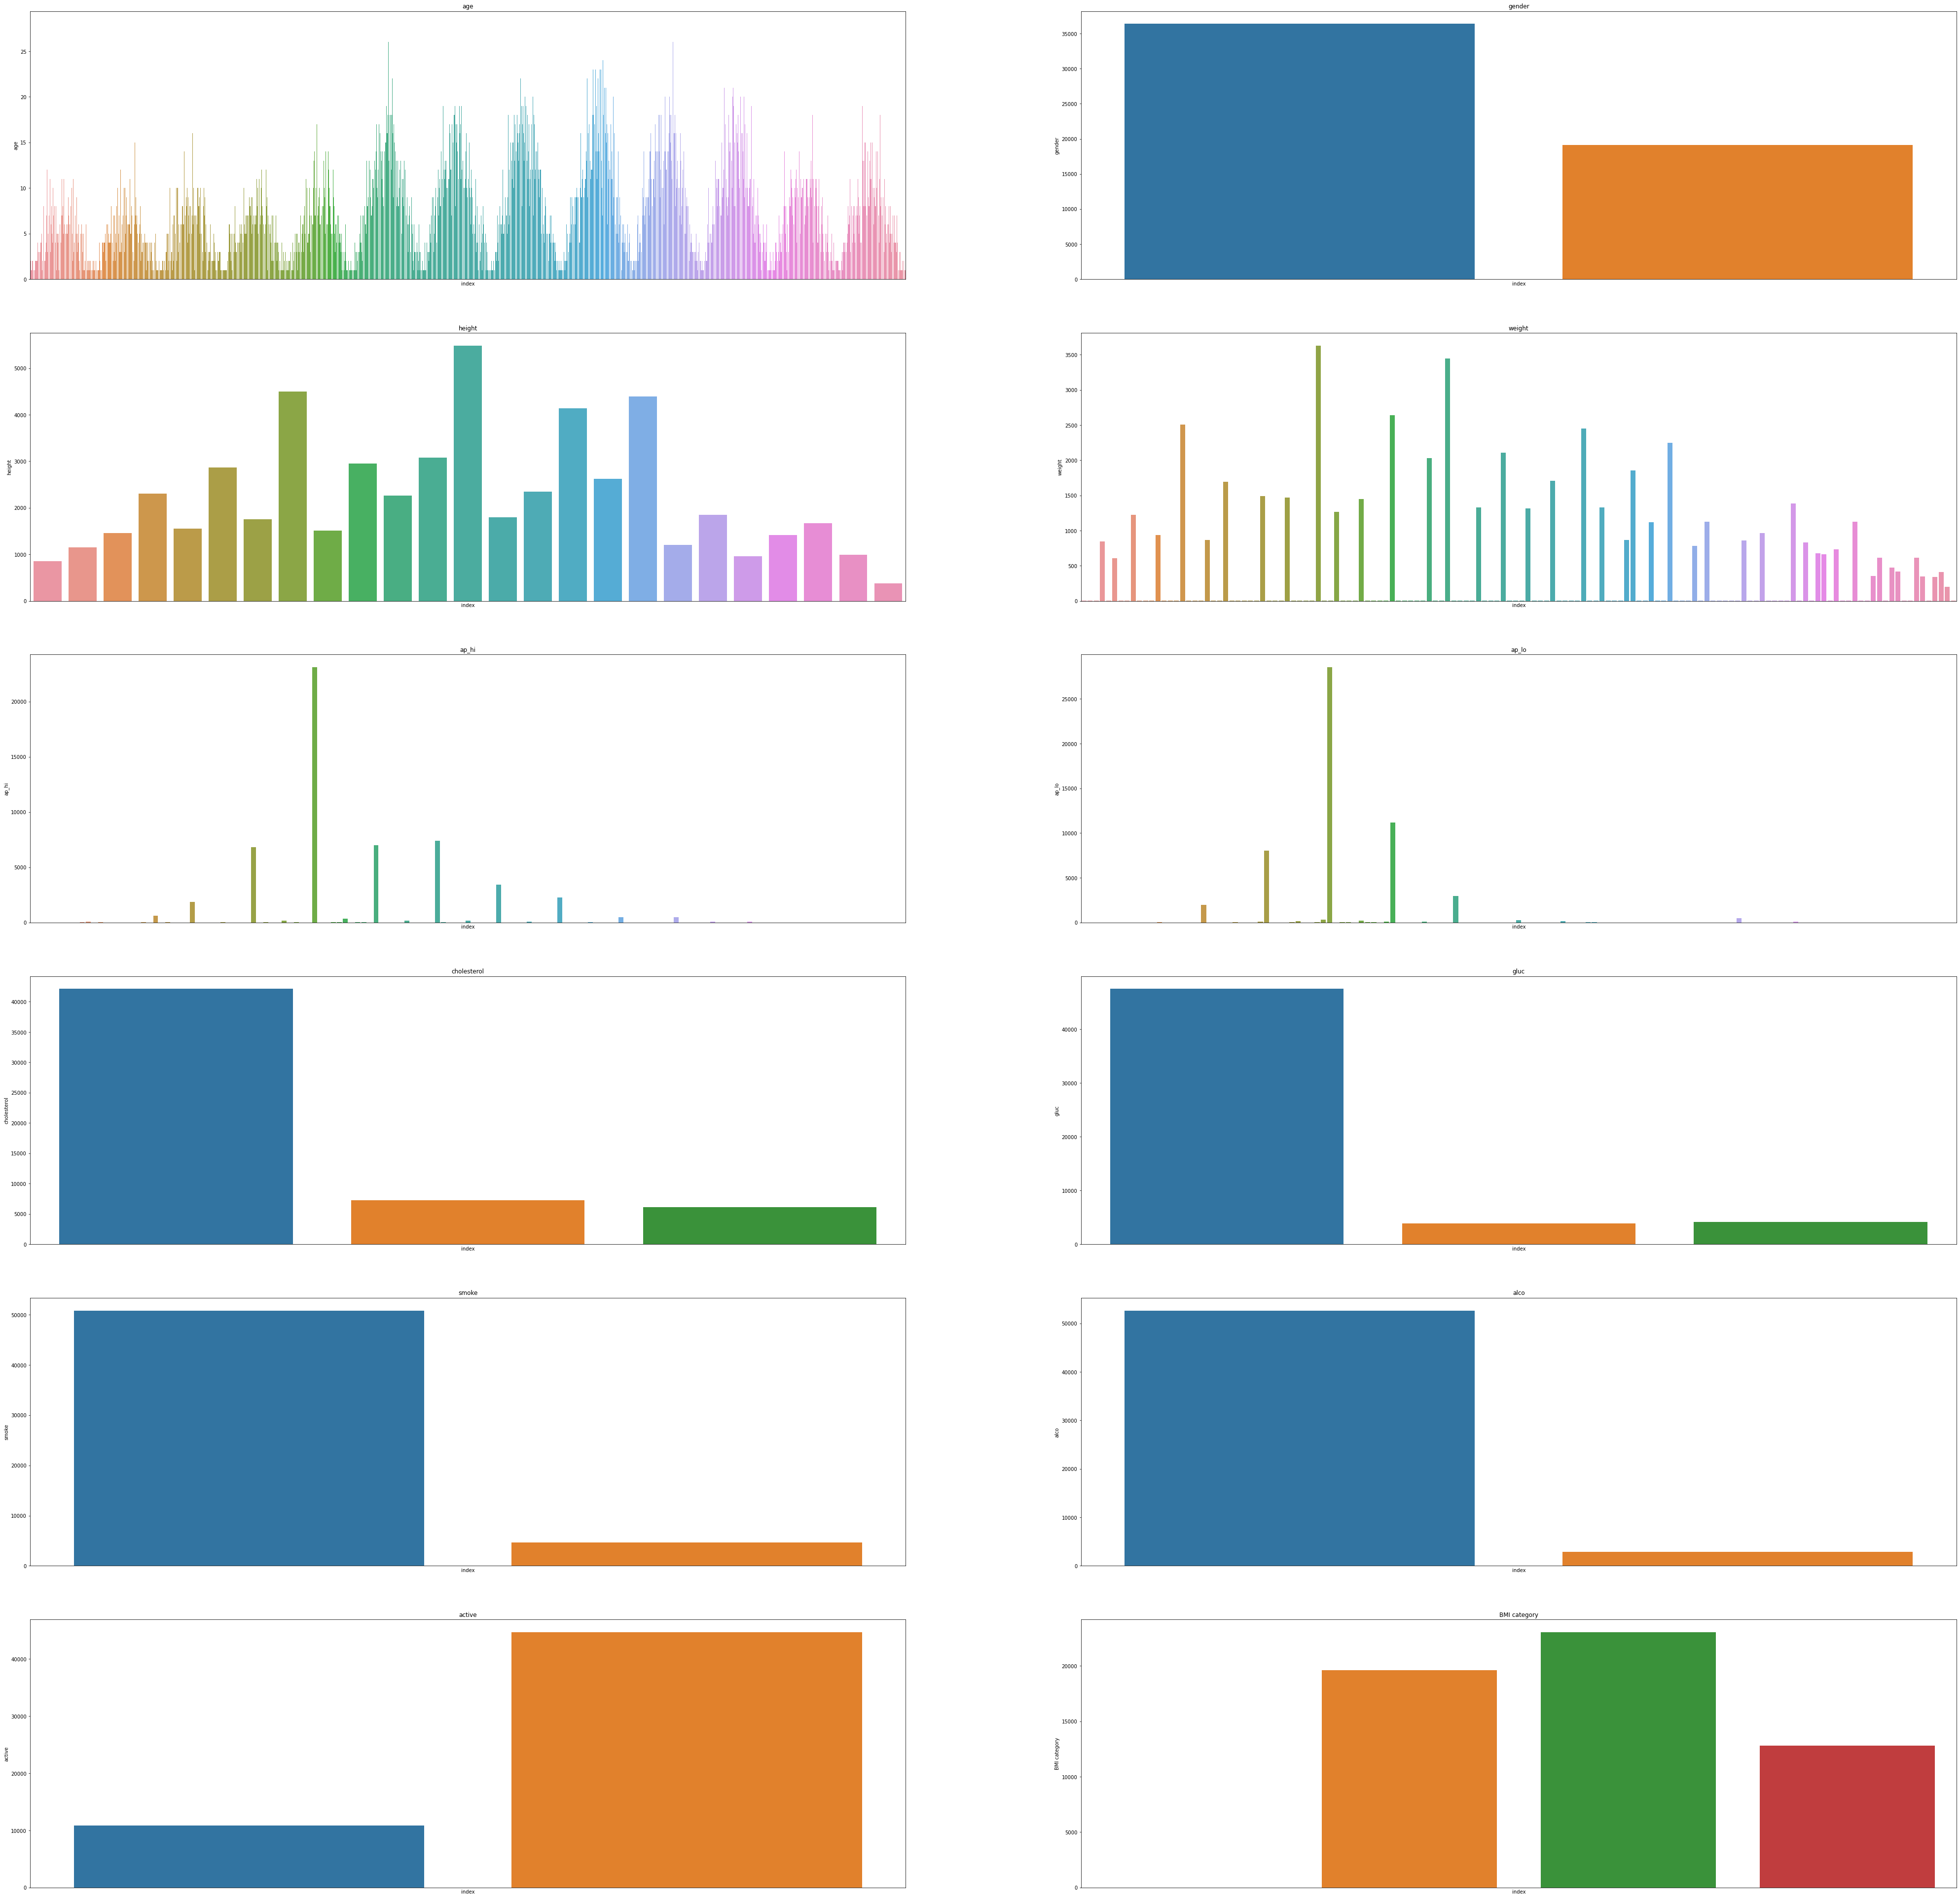

In [16]:
columns = ['age', 'gender', 'height', 'weight', 'ap_hi',
           'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco',
           'active','BMI category']
f, ax = plt.subplots(6, 2, figsize=(70, 70))
for i, c in enumerate(columns):
    g = sns.barplot(data=pd.DataFrame(train[c].value_counts()).reset_index(), x='index', y=c, ax=ax[i//2, i%2])
    g.set(xticks=[])
    g.set(title=c)

### Drop Columns

In [17]:
train = train.drop(['id','height_square','BMI'], axis=1) #Drop unneccesay columns

In [18]:
train.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI category
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,2
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,4
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,2
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,3
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,2


In [19]:
train['weight'] = train['weight'].astype(int) #Remove decimal from weight column

In [20]:
train.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI category
0,18393,2,168,62,110,80,1,1,0,0,1,0,2
1,20228,1,156,85,140,90,3,1,0,0,1,1,4
2,18857,1,165,64,130,70,3,1,0,0,0,1,2
3,17623,2,169,82,150,100,1,1,0,0,1,1,3
4,17474,1,156,56,100,60,1,1,0,0,0,0,2


### Check Feature Importance

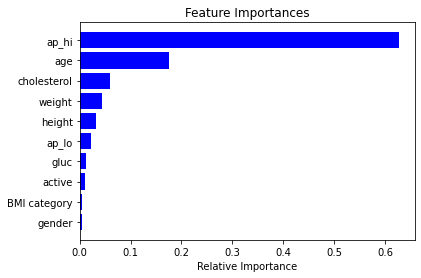

In [21]:
from sklearn.ensemble import RandomForestRegressor

X = train.drop('cardio', axis=1)
y = train['cardio']

model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(X,y)

features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Let's break our dataset into Train and Test

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import metrics #to add MAE,MSE,R-sqaure, RMAE
from sklearn.tree import DecisionTreeClassifier #CART
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn import neighbors #for KNN
from sklearn.neighbors import KNeighborsRegressor #KNN library
from sklearn.naive_bayes import GaussianNB #For Navie Bayes
from sklearn.metrics import accuracy_score,accuracy_score,confusion_matrix,classification_report #Gives best accuracy rate
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier

features = ['age', 'gender', 'height', 'weight', 'ap_hi','ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco','active','BMI category']
X = train[features]
y = train['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# CART

In [23]:
model = DecisionTreeClassifier()                       
model.fit(X_train, y_train)
y_model_DT = model.predict(X_test)

from sklearn import metrics
cm=confusion_matrix(y_test,y_model_DT)
print(classification_report(y_test,y_model_DT))
print(' \nThe confusion matrix: ')
print(cm)

              precision    recall  f1-score   support

           0       0.62      0.63      0.63      5514
           1       0.63      0.62      0.63      5588

    accuracy                           0.63     11102
   macro avg       0.63      0.63      0.63     11102
weighted avg       0.63      0.63      0.63     11102

 
The confusion matrix: 
[[3472 2042]
 [2116 3472]]


### Logistic Regression

In [24]:
logreg = LogisticRegression() # instantiate the model
logreg.fit(X_train,y_train) #fit the model with data
y_pred_lr=logreg.predict(X_test) #Predict on Test data

from sklearn import metrics
cm=confusion_matrix(y_test,y_pred_lr)
print(classification_report(y_test,y_pred_lr))
print(' \nThe confusion matrix: ')
print(cm)

              precision    recall  f1-score   support

           0       0.67      0.75      0.71      5514
           1       0.72      0.64      0.68      5588

    accuracy                           0.70     11102
   macro avg       0.70      0.70      0.69     11102
weighted avg       0.70      0.70      0.69     11102

 
The confusion matrix: 
[[4119 1395]
 [1991 3597]]


### KNN

In [25]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'distance', algorithm = 'kd_tree', p = 1)
knn.fit(X_train, y_train)
y_pred_KNN = knn.predict(X_test)

from sklearn import metrics
cm=confusion_matrix(y_test,y_pred_KNN)
print(classification_report(y_test,y_pred_KNN))
print(' \nThe confusion matrix: ')
print(cm)

              precision    recall  f1-score   support

           0       0.66      0.71      0.68      5514
           1       0.69      0.64      0.67      5588

    accuracy                           0.68     11102
   macro avg       0.68      0.68      0.68     11102
weighted avg       0.68      0.68      0.68     11102

 
The confusion matrix: 
[[3906 1608]
 [1992 3596]]


### Navies Bayes

In [26]:
model = GaussianNB()                       
model.fit(X_train, y_train)
y_model_NB = model.predict(X_test)

from sklearn import metrics
cm=confusion_matrix(y_test,y_model_NB)
print(classification_report(y_test,y_model_NB))
print(' \nThe confusion matrix: ')
print(cm)

              precision    recall  f1-score   support

           0       0.55      0.88      0.68      5514
           1       0.72      0.29      0.42      5588

    accuracy                           0.59     11102
   macro avg       0.63      0.59      0.55     11102
weighted avg       0.64      0.59      0.55     11102

 
The confusion matrix: 
[[4870  644]
 [3952 1636]]


### Random Forest Classifier

In [27]:
clf=RandomForestClassifier(n_estimators=100) #Create a Gaussian Classifier
clf.fit(X_train,y_train) 
y_pred_RFC=clf.predict(X_test)

from sklearn import metrics
cm=confusion_matrix(y_test,y_pred_RFC)
print(classification_report(y_test,y_pred_RFC))
print(' \nThe confusion matrix: ')
print(cm)


              precision    recall  f1-score   support

           0       0.70      0.73      0.71      5514
           1       0.72      0.69      0.70      5588

    accuracy                           0.71     11102
   macro avg       0.71      0.71      0.71     11102
weighted avg       0.71      0.71      0.71     11102

 
The confusion matrix: 
[[4015 1499]
 [1749 3839]]


### Comparing all the models

In [28]:
res = {'Decision Tree Classifier':{'MAE':round(metrics.mean_absolute_error(y_test, y_model_DT),4),
                   'MSE':round(metrics.mean_squared_error(y_test, y_model_DT),4),
                   'RMSE':round(np.sqrt(metrics.mean_squared_error(y_test, y_model_DT)),4),
                   'R2':round(metrics.r2_score(y_test, y_model_DT), 4)}, 
      'Logistic Regression':{'MAE':round(metrics.mean_absolute_error(y_test, y_pred_lr),4),
                   'MSE':round(metrics.mean_squared_error(y_test, y_pred_lr),4),
                   'RMSE':round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)),4),
                   'R2':round(metrics.r2_score(y_test, y_pred_lr), 4)},
             'KNN':{'MAE':round(metrics.mean_absolute_error(y_test, y_pred_KNN),4),
                   'MSE':round(metrics.mean_squared_error(y_test, y_pred_KNN),4),
                   'RMSE':round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNN)),4),
                   'R2':round(metrics.r2_score(y_test, y_pred_KNN), 4)},
             'Naives Bayes':{'MAE':round(metrics.mean_absolute_error(y_test, y_model_NB),4),
                   'MSE':round(metrics.mean_squared_error(y_test, y_model_NB),4),
                   'RMSE':round(np.sqrt(metrics.mean_squared_error(y_test, y_model_NB)),4),
                   'R2':round(metrics.r2_score(y_test, y_model_NB), 4)},
             'Random Forest Classifier':{'MAE':round(metrics.mean_absolute_error(y_test, y_pred_RFC),4),
                   'MSE':round(metrics.mean_squared_error(y_test, y_pred_RFC),4),
                   'RMSE':round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_RFC)),4),
                   'R2':round(metrics.r2_score(y_test, y_pred_RFC), 4)}
      }

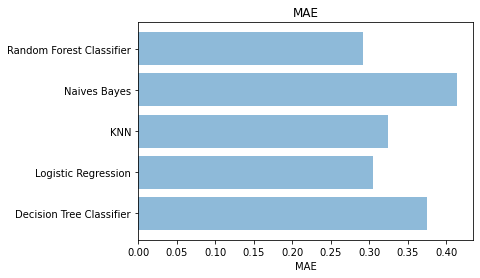

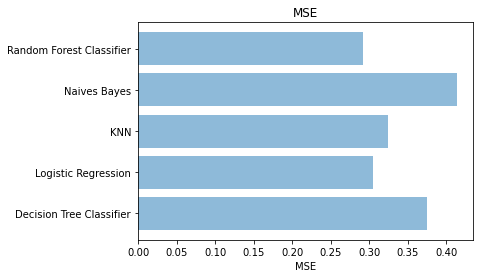

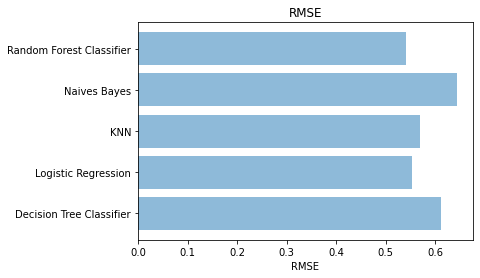

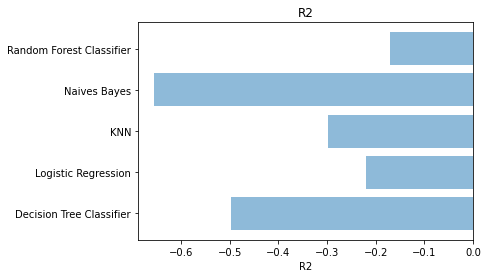

In [29]:
for metric in ['MAE', 'MSE', 'RMSE', 'R2']:
    objects = ('Decision Tree Classifier','Logistic Regression', 'KNN', 'Naives Bayes', 'Random Forest Classifier')
    y_pos = np.arange(len(objects))
    performance = [res['Decision Tree Classifier'][metric],
                   res['Logistic Regression'][metric], 
                   res['KNN'][metric],
                   res['Naives Bayes'][metric],
                   res['Random Forest Classifier'][metric]]

    plt.barh(y_pos, performance, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)
    plt.xlabel(metric)
    plt.title(metric)

    plt.show()